In [3]:
import sys
import os
import pandas
import csv
from sklearn import svm, preprocessing, neighbors, ensemble, neural_network, naive_bayes
import matplotlib.pyplot as plt

In [4]:
train = pandas.read_csv('train_test_datasets/features_train_70000.csv') #import our training data from the csv file (56,000 image)
test = pandas.read_csv('train_test_datasets/features_test_70000.csv') #import our test data from the csv file (14,000 image)

In [6]:
train.head()

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility,Complexity,Tag
0,15.0238,2.91000,274.7740,1789,228.0,160.4439,0.147740,0.8579,0
1,2.8010,0.92232,235.7319,917,179.0,145.3054,0.120090,1.2987,0
2,3.9885,0.88732,174.5089,817,260.0,182.6219,0.200340,1.5965,0
3,5.4531,1.83640,343.9752,1336,69.5,120.5608,0.083738,1.2973,0
4,15.8010,3.38050,443.4495,2785,118.0,113.9388,0.231590,1.2115,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55999 entries, 0 to 55998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kurtosis         55999 non-null  float64
 1    Skewness        55999 non-null  float64
 2    Std             55999 non-null  float64
 3    Range           55999 non-null  int64  
 4    Median          55999 non-null  float64
 5    Geometric_Mean  55999 non-null  float64
 6    Mobility        55999 non-null  float64
 7    Complexity      55999 non-null  float64
 8    Tag             55999 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 3.8 MB


In [9]:
test.head()

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility,Complexity,Tag
0,2.6629,0.89102,163.6614,630,201.5,208.3995,0.153760,1.59810,0
1,2.6006,0.91121,290.5423,963,142.0,88.5387,0.078463,1.52520,0
2,2.8175,0.99971,320.6575,1187,10.5,37.5651,0.149740,1.26250,0
3,14.7654,3.40910,576.6068,3474,50.0,79.9371,0.256130,1.42100,0
4,50.4213,6.72800,1354.7782,11733,14.5,17.0537,0.356650,0.70411,0


In [16]:
train.rename(columns={i: i.strip(' ') for i in train.columns}, inplace=True)

In [17]:
train.columns

Index(['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean',
       'Mobility', 'Complexity', 'Tag'],
      dtype='object')

In [18]:
test.rename(columns={i: i.strip(' ') for i in test.columns}, inplace=True)

In [19]:
x_train, y_train = train.drop(['Tag'], axis=1), train['Tag']
x_test, y_test = test.drop(['Tag'], axis=1), test['Tag']

In [20]:
scaling = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_train, x_test = scaling.fit_transform(x_train), scaling.fit_transform(x_test) #scale the features in the interval [0:1]

In [4]:
import matplotlib.pyplot as plt
import cv2
from numpy import std, ptp, median
from scipy.stats import skew, kurtosis, mstats
import eeglib
import joblib
from sklearn import preprocessing
import pandas as pd
import os

In [5]:

svm_classifier = joblib.load('trained/svm-classifier.joblib')
knn_classifier = joblib.load('trained/knn-classifier.joblib')
rf_classifier = joblib.load('trained/rf-classifier.joblib')
mlp_classifier = joblib.load('trained/mlp-classifier.joblib')
nb_classifier = joblib.load('trained/nb-classifier.joblib')

   Kurtosis   Skewness          Std    Range   Median   Geometric_Mean  \
0   7.47907    2.32575  1493.443619  10098.0    409.0      1306.575779   

    Mobility   Complexity  
0   0.707152      1.27835  
        Kurtosis   Skewness          Std    Range   Median   Geometric_Mean  \
13995    3.49710    1.32400   274.312100    981.0    166.0       138.261700   
13996  131.43960   10.62380   614.771000   8413.0    163.0       165.482300   
13997    9.00040    2.33100   313.368500   1823.0    183.0       126.337800   
13998    5.38110    1.74460   357.838400   1644.0     81.5       104.755500   
13999    7.47907    2.32575  1493.443619  10098.0    409.0      1306.575779   

        Mobility   Complexity  
13995   0.930980      1.76780  
13996   0.559480      1.17510  
13997   0.912830      1.73960  
13998   0.923240      1.75000  
13999   0.707152      1.27835  
[0.02461431 0.22065844 0.40637717 0.17180484 1.         0.83303977
 0.48252674 0.62590787]


/tmp/ipykernel_12060/2009352182.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append(df, ignore_index=True)


array([0])

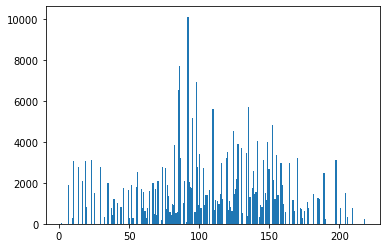

In [20]:
import numpy as np

def geo_mean(x):
    x_new = [i for i in x if i != 0]
    a = np.log(x_new)
    return np.exp(a.mean())

def stego_or_clean(img_path, classifier):
    '''
        This function returns the type of the image: either clean or stego, using the chosen classifier
        IMPORTANT:
            - There's a chance of misclassification in case of non-monochromatic/high-resolution images,
            - The model detects only LSB Steganography
        This limitation is due to the training dataset, which does not provide a wide range of images.
    '''
    im = cv2.imread(img_path)
    vals = im.mean(axis=2).flatten()
    # plot histogram with 255 bins
    b, bins, patches = plt.hist(vals, 255)
    data = {'Kurtosis' : [kurtosis(b)],
        ' Skewness' : [skew(b)],
        ' Std' : [std(b)],
        ' Range' : [ptp(b)],
        ' Median': [median(b)],
        ' Geometric_Mean': [geo_mean(b)],
        ' Mobility': [eeglib.features.hjorthMobility(b)],
        ' Complexity': [eeglib.features.hjorthComplexity(b)]
       }
    df = pd.DataFrame(data)
    print(df.tail())
    testing_data = pd.read_csv('train_test_datasets/features_test_70000.csv')
    x_test, y_test = testing_data.drop([' Tag'], axis=1), testing_data[' Tag']
    x_test = x_test.append(df, ignore_index=True)
    print(x_test.tail())
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_test = scaler.fit_transform(x_test)
    print(x_test[13999])
    return classifier.predict([x_test[13999]])

#choose an image to apply the steganalysis using the chosen classifier
stego_or_clean('image.jpg', rf_classifier)

In [30]:
from pystegano import pystegano

cover_image = cv2.imread("image.jpg", cv2.IMREAD_UNCHANGED)
secret_message = 'Hello! ffgd fgfgfdddddddddddddddddddddddddddddddddf'
encoded_image = pystegano.lsb.encode(cover_image, secret_message)
cv2.imwrite("LSB1.jpg", encoded_image)

True

   Kurtosis   Skewness         Std   Range   Median   Geometric_Mean  \
0  0.875113   1.055405  775.148431  3606.0    844.0       669.802017   

    Mobility   Complexity  
0   0.251943     2.752333  
         Kurtosis   Skewness         Std   Range   Median   Geometric_Mean  \
13995    3.497100   1.324000  274.312100   981.0    166.0       138.261700   
13996  131.439600  10.623800  614.771000  8413.0    163.0       165.482300   
13997    9.000400   2.331000  313.368500  1823.0    183.0       126.337800   
13998    5.381100   1.744600  357.838400  1644.0     81.5       104.755500   
13999    0.875113   1.055405  775.148431  3606.0    844.0       669.802017   

        Mobility   Complexity  
13995   0.930980     1.767800  
13996   0.559480     1.175100  
13997   0.912830     1.739600  
13998   0.923240     1.750000  
13999   0.251943     2.752333  
[0.         0.1476975  0.20126768 0.05704437 1.         0.42582215
 0.14507308 1.        ]


/tmp/ipykernel_12060/2009352182.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append(df, ignore_index=True)


array([1])

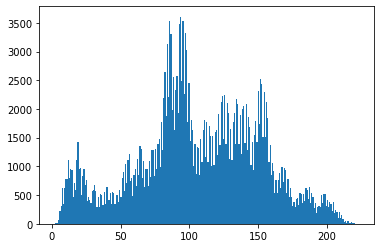

In [31]:
stego_or_clean('LSB1.jpg', rf_classifier)

     Kurtosis   Skewness          Std     Range   Median   Geometric_Mean  \
0  244.019245  15.601617  10755.56138  172011.0    867.0       531.226649   

    Mobility   Complexity  
0   1.025256     0.610381  
         Kurtosis   Skewness          Std     Range   Median   Geometric_Mean  \
13995    3.497100   1.324000    274.31210     981.0    166.0       138.261700   
13996  131.439600  10.623800    614.77100    8413.0    163.0       165.482300   
13997    9.000400   2.331000    313.36850    1823.0    183.0       126.337800   
13998    5.381100   1.744600    357.83840    1644.0     81.5       104.755500   
13999  244.019245  15.601617  10755.56138  172011.0    867.0       531.226649   

        Mobility   Complexity  
13995   0.930980     1.767800  
13996   0.559480     1.175100  
13997   0.912830     1.739600  
13998   0.923240     1.750000  
13999   1.025256     0.610381  
[0.96138372 0.98314411 1.         1.         1.         0.33720303
 0.71834186 0.25819082]


/tmp/ipykernel_12060/2009352182.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append(df, ignore_index=True)


array([0])

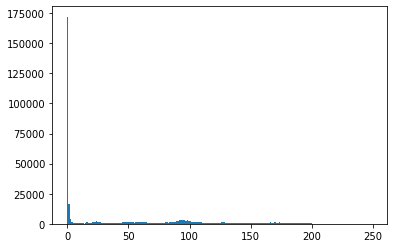

In [24]:
stego_or_clean('test_imgs/8.jpg', rf_classifier)

     Kurtosis   Skewness           Std     Range   Median   Geometric_Mean  \
0  243.936918  15.598046  10744.597049  171824.0    864.0        536.15172   

    Mobility   Complexity  
0   1.024386     0.610284  
         Kurtosis   Skewness           Std     Range   Median  \
13995    3.497100   1.324000    274.312100     981.0    166.0   
13996  131.439600  10.623800    614.771000    8413.0    163.0   
13997    9.000400   2.331000    313.368500    1823.0    183.0   
13998    5.381100   1.744600    357.838400    1644.0     81.5   
13999  243.936918  15.598046  10744.597049  171824.0    864.0   

        Geometric_Mean   Mobility   Complexity  
13995        138.26170   0.930980     1.767800  
13996        165.48230   0.559480     1.175100  
13997        126.33780   0.912830     1.739600  
13998        104.75550   0.923240     1.750000  
13999        536.15172   1.024386     0.610284  
[0.96105768 0.98293901 1.         1.         1.         0.34035262
 0.71769697 0.25813711]


/tmp/ipykernel_12060/2009352182.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append(df, ignore_index=True)


array([0])

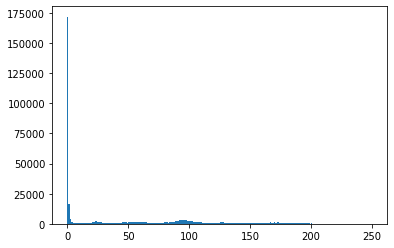